In [1]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense , Input


In [9]:
def show_digits(n,dims):
     #original images 
    plt.figure(figsize=(10,5))
    for i in range(n):
        ax=plt.subplot(2,n,i+1)
        plt.imshow(x_test[i].reshape(*dims))
        plt.gray()    # by default in bgr , convert it into grayscale
        if i==n/2:
            ax.set_title("Original")
    #re-constructed images
        ax=plt.subplot(2,n,i+n+1)
        plt.imshow(reconstructed[i].reshape(*dims))
        plt.gray()    
        if i==n/2:
            ax.set_title("Re-constructed")
    plt.show()

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
input_size=784  #hyperparameters
hidden_size = 128  #hyperpara
code_size = 32    #hyperpara

input_img = Input(shape=(input_size,),name="INPUT")
hidden_1 = Dense(hidden_size, activation='relu',name='HIDDEN-1')(input_img)
code = Dense(code_size, activation='relu',name='CODE')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu',name='HIDDEN-2')(code)
output_img = Dense(input_size, activation='sigmoid',name='OUTPUT')(hidden_2)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=3) #we need output as input

Epoch 1/3
60000/60000 [==============================] - 20s 341us/step - loss: 0.1378
Epoch 2/3
60000/60000 [==============================] - 19s 317us/step - loss: 0.0996
Epoch 3/3
60000/60000 [==============================] - 13s 211us/step - loss: 0.0945


In [8]:
reconstructed = autoencoder.predict(x_test)

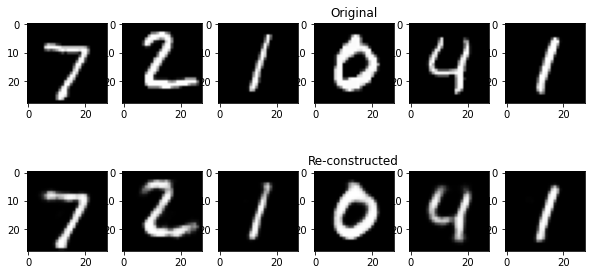

In [10]:
show_digits(6,(28,28))